<a href="https://colab.research.google.com/github/leovilor/portfolio_data_science/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/leovilor/portfolio_data_science/master/logoDS.png">

#### **Projetos Data Science**
*by Leonardo Vilor*
 
---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada pelo recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/leovilor/dsger/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## 1) Obtenção dos Dados

O Covid-19 é uma doença muito nova, e, por este motivo o trabalho de se encontrar uma base de dados confiável se torna uma tarefa difícil, pois existem muitas fontes que disponibilizam os dados referente a esta doença (Governo Federal, Governo Estadual e fontes não oficiais). O melhor cenário seria extrair os dados de um única fonte.

Após uma análise bem criteriosa, foi definido neste projeto a utilização da base de dados mantida pela [Our World in Data](https://ourworldindata.org/coronavirus), uma entidade que tem o objetivo de tornar o conhecimento dos grandes problemas acessível e compreensível, para fazer progresso contra os maiores problemas do mundo.

Esta base de dados é atualizada diariamente e inclui dados sobre casos confirmados, óbitos e testes, bem como outras variáveis ​​de potencial interesse.



### Dicionário de Variáveis

As variáveis abaixo ​​representam os principais dados existentes na base de dados utilizada.

* `continent`: Nome do Continente 
* `location`: Nome do País
* `date`: Data do levantamento
* `total_cases`: Soma total dos casos
* `total_deaths`: Total de mortes


### Criando o Dataframe

Nesta etapa é feita a importação das bibliotecas necessárias e im portação do dataset utilizado para um DataFrame (df).

In [29]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/leovilor/dsger/master/datasets/owid-covid-data.csv")

## 2) Análise Exploratória dos Dados

Após a importação dos pacotes e do dataset, vamos iniciar a Análise Exploratória.


***Vamos verificar as Dimensões do Dataset***

In [31]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  41 
Entradas:  51183


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [32]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

***Vamos verificar os tipos das variáveis e garantir que estarão dentro do formato necessário através do método `df.dtypes`***

In [35]:
  # verificando o tipo das variáveis
  df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

***Verificação dos dados faltantes***

In [37]:
# verificando dados ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

new_tests                          0.63
new_tests_per_thousand             0.63
total_tests_per_thousand           0.62
total_tests                        0.62
tests_per_case                     0.61
positive_rate                      0.61
new_tests_smoothed                 0.58
new_tests_smoothed_per_thousand    0.58
handwashing_facilities             0.58
tests_units                        0.56
extreme_poverty                    0.41
male_smokers                       0.31
female_smokers                     0.30
total_deaths_per_million           0.25
total_deaths                       0.24
hospital_beds_per_thousand         0.20
stringency_index                   0.17
human_development_index            0.14
aged_65_older                      0.12
gdp_per_capita                     0.12
aged_70_older                      0.11
cardiovasc_death_rate              0.11
median_age                         0.11
diabetes_prevalence                0.08
total_cases_per_million            0.08


***A coluna `date` não esta no formato DateTime, assim, vamos alterar o formato para que se possam explorar esta variável.***

In [41]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

***Agora, vamos verificar qual a data mais recente do nosso dataset.***

In [40]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2020-10-19 00:00:00')

***Países com mais casos na data mais recente:***

In [43]:
df.loc[df.date == '2020-10-19'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50888,OWID_WRL,NaN,World,2020-10-19,40106965.0,320154.0,352319.857,1114636.0,3713.0,5257.571,5145.350,41.073,45.199,142.997,0.476,0.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,NaN
47911,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,24636.042,144.540,169.205,663.662,1.163,2.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
22141,IND,Asia,India,2020-10-19,7550273.0,55722.0,61390.714,114610.0,579.0,780.000,5471.195,40.378,44.486,83.050,0.420,0.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.640
6870,BRA,South America,Brazil,2020-10-19,5235344.0,10982.0,20051.714,153905.0,230.0,488.143,24630.027,51.666,94.335,724.056,1.082,2.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
39856,RUS,Europe,Russia,2020-10-19,1399334.0,15099.0,14373.714,24187.0,185.0,227.143,9588.784,103.464,98.494,165.739,1.268,1.556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,GRL,North America,Greenland,2020-10-19,16.0,0.0,0.000,NaN,0.0,0.000,281.829,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.677200e+04,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.70,NaN
16093,FLK,South America,Falkland Islands,2020-10-19,13.0,0.0,0.000,NaN,0.0,0.000,3732.415,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
33040,MSR,North America,Montserrat,2020-10-19,13.0,0.0,0.000,1.0,0.0,0.000,2600.520,0.000,0.000,200.040,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16,NaN
41060,SLB,Oceania,Solomon Islands,2020-10-19,3.0,0.0,NaN,NaN,0.0,NaN,4.368,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.89,1.400,73.00,0.546


***Portanto, os países líderes em casos aos 19 de Outubro de 2020 eram:***

* Estados Unidos - 8.154.595 casos
* Índia - 7.550.273 casos
* Brasil - 5.235.344 casos 


***Países com mais mortes na data mais recente:***

In [45]:
df.loc[df.date == '2020-10-19'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50888,OWID_WRL,NaN,World,2020-10-19,40106965.0,320154.0,352319.857,1114636.0,3713.0,5257.571,5145.350,41.073,45.199,142.997,0.476,0.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
47911,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,24636.042,144.540,169.205,663.662,1.163,2.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
6870,BRA,South America,Brazil,2020-10-19,5235344.0,10982.0,20051.714,153905.0,230.0,488.143,24630.027,51.666,94.335,724.056,1.082,2.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
22141,IND,Asia,India,2020-10-19,7550273.0,55722.0,61390.714,114610.0,579.0,780.000,5471.195,40.378,44.486,83.050,0.420,0.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66,0.640
30787,MEX,North America,Mexico,2020-10-19,851227.0,1320.0,2640.571,86167.0,108.0,360.714,6602.101,10.238,20.480,668.310,0.838,2.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05,0.774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41060,SLB,Oceania,Solomon Islands,2020-10-19,3.0,0.0,NaN,NaN,0.0,NaN,4.368,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.546
44241,SYC,Africa,Seychelles,2020-10-19,149.0,0.0,0.143,NaN,0.0,0.000,1515.152,0.000,1.453,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.834000e+04,208.354,36.2,8.606,5.586,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40,0.797
45783,TLS,Asia,Timor,2020-10-19,29.0,0.0,0.143,NaN,0.0,0.000,21.996,0.000,0.108,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50,0.625
48351,VAT,Europe,Vatican,2020-10-19,26.0,0.0,2.000,NaN,0.0,0.000,32138.443,0.000,2472.188,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.090000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


***Portanto, os países líderes em casos de morte aos 19 de Outubro de 2020 eram:***

* Estados Unidos - 8.154.595 casos
* Brasil - 5.235.344 casos
* Índia - 7.550.273 casos

Vamos plotar um gráfico de barras, para uma melhor visualização:

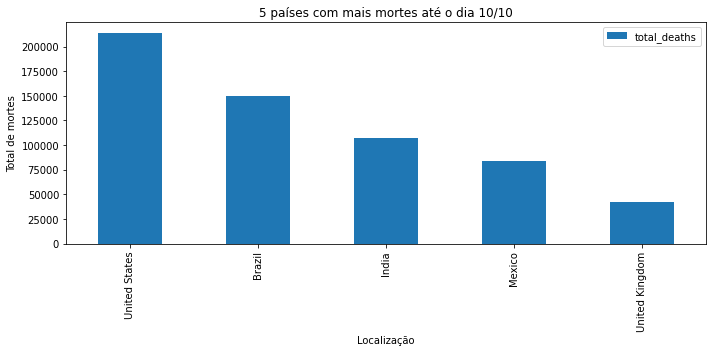

In [50]:
gbr = df.loc[df.date == '2020-10-10', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,5))

gbr.plot(x="location", y="total_deaths", kind="bar", ax=ax)

ax.set_title("5 países com mais mortes até o dia 10/10")
ax.set_xlabel("Localização")
ax.set_ylabel("Total de mortes")

plt.tight_layout()


***Como o vírus está progredindo?***

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

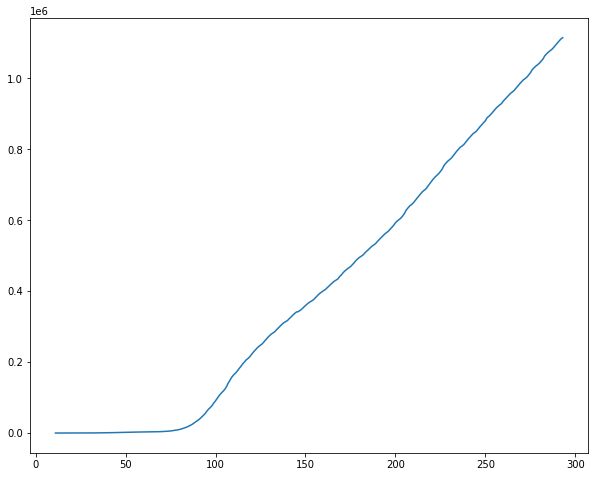

In [51]:
# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

### Análise Exploratória Para O Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.


In [66]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6577,BRA,South America,Brazil,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
6578,BRA,South America,Brazil,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
6579,BRA,South America,Brazil,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
6580,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
6581,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [67]:
df_brasil.date.max()

Timestamp('2020-10-19 00:00:00')

Acima, verificamos que nosso dataset inclui datas desde 31-12-2019 até 19-10-2020.

***Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.***

In [68]:
#Identificar quando foi registrado o primeiro caso no Brasil
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6634,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.143,NaN,0.0,0.0,0.005,0.005,0.001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [69]:
#Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6655,BRA,South America,Brazil,2020-03-18,291.0,57.0,36.714,1.0,1.0,0.143,1.369,0.268,0.173,0.005,0.005,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [62]:
# primeira morte
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[6655]))

A primeira morte foi registrada em 2020-03-18 00:00:00


***Uma informação interessante para investigarmos é quanto tempo levou desde o primeiro caso até a primeira morte.***

In [75]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
delta = df_brasil.date.loc[6655] - df_brasil.date.loc[6634]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


## Conclusão

A fonte de dados utilizada neste projeto é medida e atualizada diariamente, portanto, esse conjunto de dados ficará desatualizado.

De acordo com a análise exploratório efetuada, cncluimos que:

* Os Estados Unidos é o país com casos e morte dispoarados.
* No Brasil os casos estão em grande crescimento.

